In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading datasets
df = pd.read_csv('C:/Users/micha/Downloads/UsedCarsSA_Clean_EN.csv')
df.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False


In [3]:
# Information abaut data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [4]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


In [5]:
# 25 % of Price column is 0, in next steps I change that extreme value.

In [6]:
# Cleaning dataset
df = df.dropna()
df.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [7]:
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  3


In [8]:
# cleaning 'Price' column from 0 value
df[df.Price == 0]
df = df[df['Price'] != 0]
df.sort_values(by = "Price", ascending = True, inplace=True)
# I drop a value in price and mileage colum, beuse it clean a datasets from unreal value
df = df[df['Price'] > 5000]
df = df[df['Mileage'] < 700000]
df.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500,False
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500,False
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000,False
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000,False
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000,False
5038,Mercury,Grand Marquis,2001,Other,Blue,Semi Full,4.6,Gas,Automatic,33000,Riyadh,6000,False
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500,False
2809,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500,False
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500,False
6884,Hyundai,Elantra,2006,Saudi,White,Full,2.0,Gas,Automatic,10000,Dammam,7000,False


In [9]:
df = df.rename(columns = {"Type": "Model"})
df = df.rename(columns = {"Make": "Producer"})
df

,Producer,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500,False
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500,False
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000,False
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000,False
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,Bentley,Arnage,2020,Saudi,Black,Standard,1.0,Gas,Automatic,300,Jeddah,772500,False
4038,Mercedes,G,2019,Other,Black,Full,4.0,Gas,Automatic,39000,Riyadh,800000,False
3826,Mercedes,G,2019,Saudi,Grey,Full,4.0,Gas,Automatic,60000,Riyadh,835000,False
5913,Bentley,Bentayga,2019,Saudi,Another Color,Full,6.0,Gas,Automatic,13000,Dammam,850000,False


In [10]:
df.drop_duplicates(inplace=True)
print("Number of duplicate: ", sum(df.duplicated()))

Number of duplicate:  0


In [11]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5376.000000,5376.000000,5376.000000,5.376000e+03
mean,2014.843750,3.183612,125974.392113,8.001565e+04
std,5.068732,1.468505,107535.103400,7.508601e+04
min,1963.000000,1.000000,100.000000,5.500000e+03
25%,2013.000000,2.000000,47214.500000,3.650000e+04
50%,2016.000000,2.700000,101000.000000,5.900000e+04
75%,2018.000000,4.000000,180000.000000,9.500000e+04
max,2021.000000,9.000000,650000.000000,1.150000e+06


In [12]:
# to simplify the display, divide the year columns by decades

In [13]:
def Decades (Year):
    if  Year >= 1963 and Year <= 1969:
        return "60`"
    elif Year >= 1970 and Year <= 1979:
        return "70`"
    elif Year >= 1980 and Year <= 1989:
        return "80`"
    elif Year >= 1990 and Year <= 1999:
        return "90`"
    elif Year >= 2000 and Year <= 2009:
        return "2000`"
    elif Year >= 2010 and Year <= 2019:
        return "10`"
    else:
        return '20`'

In [14]:
df['Decades'] = df['Year'].apply(Decades)
df

,Producer,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Decades
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500,False,20`
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500,False,80`
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000,False,2000`
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000,False,2000`
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000,False,2000`
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,Bentley,Arnage,2020,Saudi,Black,Standard,1.0,Gas,Automatic,300,Jeddah,772500,False,20`
4038,Mercedes,G,2019,Other,Black,Full,4.0,Gas,Automatic,39000,Riyadh,800000,False,10`
3826,Mercedes,G,2019,Saudi,Grey,Full,4.0,Gas,Automatic,60000,Riyadh,835000,False,10`
5913,Bentley,Bentayga,2019,Saudi,Another Color,Full,6.0,Gas,Automatic,13000,Dammam,850000,False,10`


In [15]:
# most popular car
df.describe(exclude="number")

,Producer,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region,Negotiable,Decades
count,5376,5376,5376,5376,5376,5376,5376,5376,5376,5376
unique,57,350,4,15,3,3,2,27,1,7
top,Toyota,Accent,Saudi,White,Full,Gas,Automatic,Riyadh,False,10`
freq,1231,206,4038,2264,2061,5278,4820,2267,5376,4290


In [16]:
#Visualizing the data 

Text(0, 0.5, 'Quantity')

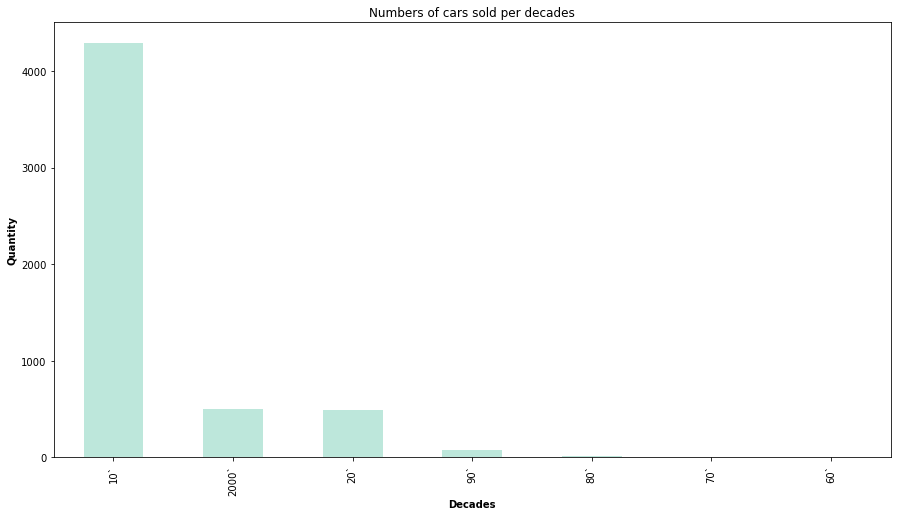

In [17]:
plt.rcParams['figure.figsize'] = [15,8]
ax = df['Decades'].value_counts().plot(kind='bar', colormap = 'icefire')
ax.title.set_text('Numbers of cars sold per decades')
plt.xlabel("Decades",fontweight = 'bold')
plt.ylabel("Quantity",fontweight = 'bold')

In [18]:
# Cars made betwenn 2001 and 2019 is tem most popular in the market

In [19]:
# Second and third place ise cars made in firs and third decade XXI century

In [20]:
# On the makret hardly ever cars maed since 60's to 90's

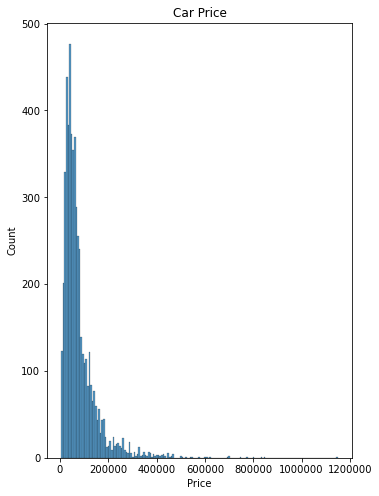

In [21]:
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title('Car Price')
sns.histplot(df.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

In [22]:
# The most cars in the maket is cost abaut 10 000

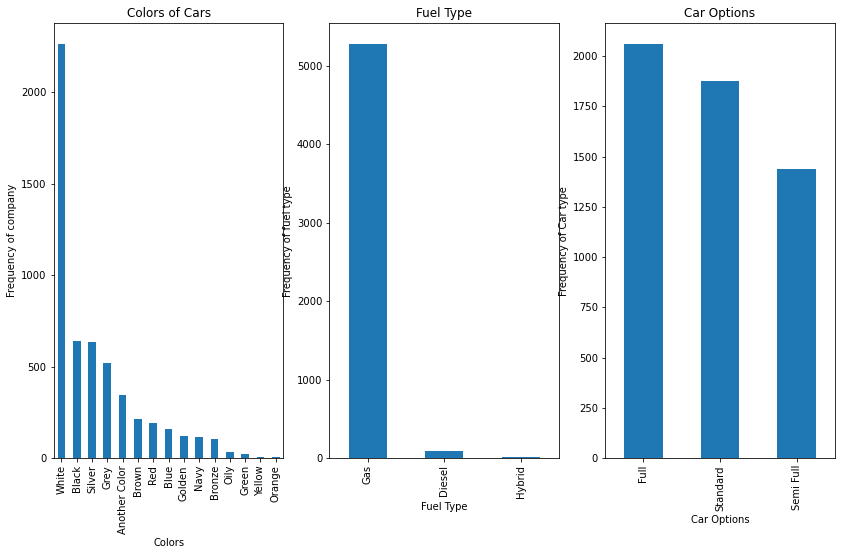

In [23]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt1 = df.Color.value_counts().plot(kind='bar')
plt.title('Colors of Cars')
plt1.set(xlabel = 'Colors', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.Options.value_counts().plot(kind='bar')
plt.title('Car Options')
plt1.set(xlabel = 'Car Options', ylabel='Frequency of Car type')

plt.show()

<Figure size 1440x432 with 0 Axes>

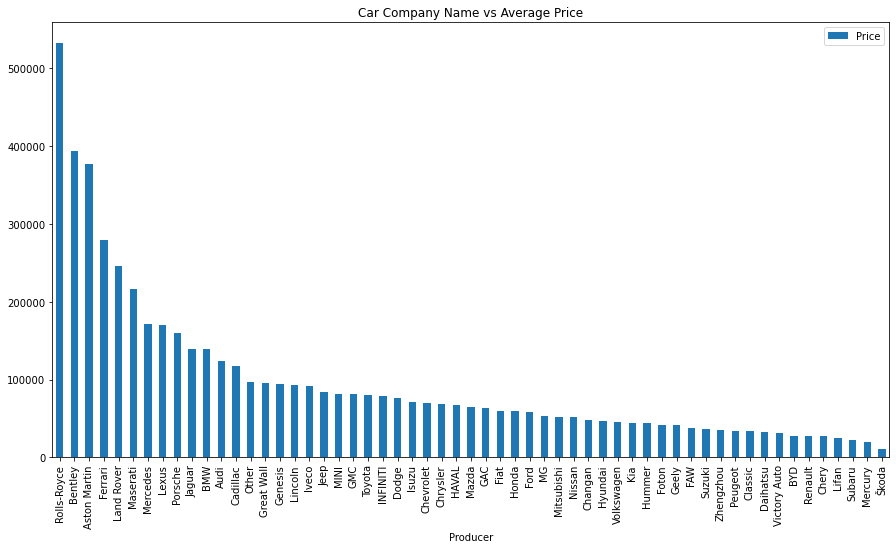

In [25]:
plt.figure(figsize=(20, 6))

df1 = pd.DataFrame(df.groupby(['Producer'])['Price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [26]:
# Most popular color of the cars is white
# Gasoline has a decisive advantage over other methods of fueling because it allows you to achieve more power, 
# and the specificity of the market is such that the amount of fuel burned does not matter. 
# If we look at the equipment versions and the graph showing the most expensive cars, you can see the correlation between the two graphs. 
# it results from the specificity of the market in Saldian Arabia, which is one of the richer countries.

<Figure size 1800x432 with 0 Axes>

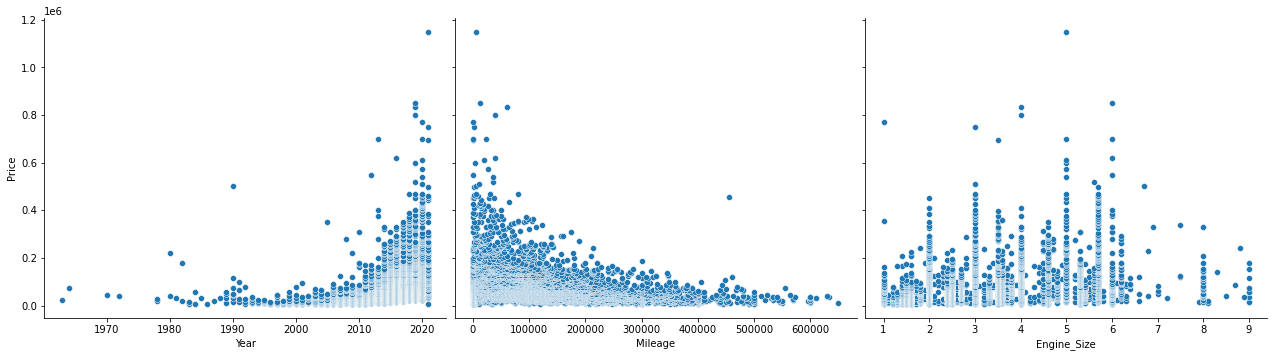

In [27]:
plt.figure(figsize=(25, 6))
sns.pairplot(df, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',height=5, aspect=1.2, kind='scatter')
plt.show()

In [28]:
# There is a positive correlation between the year of production and the price. 
# However, there is a negative correlation between mileage and price. The size of the engine does not affect the price of the car.

In [29]:
# If we look at the presented graphs, we can get a complete picture of the car market in Saldian Arabia. this is the market in which we can most often find a white car that is about 10 years old, is white and has full equipment. 
# It may come as a surprise that there are no new cars produced after 2011, but you can find very expensive cars with low mileage on the market.